In [66]:
import pandas as pd

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Libraries to help with data visualization
import seaborn as sns
import matplotlib.pyplot as plt

In [125]:
df = pd.read_csv('/content/final_table.csv')

In [126]:
df.head()

,Unnamed: 0,Age,Primary_streaming_service,Hours_per_day,While_working,Instrumentalist,Composer,Fav_genre,Exploratory,Foreign_languages,...,Anxiety,Depression,Insomnia,OCD,Music_effects,Date,Time,Year,Month,Day
0,0,25,Apple Music,2,False,False,False,EDM,False,True,...,10,3,1,4,Improve,2022-08-28,23:26:58,2022,8,28
1,1,16,Other streaming service,4,True,False,False,EDM,True,True,...,4,7,1,3,Improve,2022-09-13,01:55:43,2022,9,13
2,2,22,Spotify,10,False,True,True,EDM,False,True,...,4,7,7,3,Improve,2022-08-28,17:15:18,2022,8,28
3,3,26,Spotify,6,True,False,False,EDM,False,True,...,10,10,8,2,No effect,2022-08-30,05:16:13,2022,8,30
4,4,18,I do not use a streaming service.,4,True,True,False,EDM,False,True,...,8,7,10,6,Improve,2022-09-02,09:25:05,2022,9,2


In [70]:

#Observations
# Timestamp showing the date and time of the survey submission
# age showing the age of each participant in the survey
# hour per day indicating the number of hours each participants listened to music
# while working telling us if music was listened during work hours.
# We have fave genre telling us who was the favorite genre of each participant.
# We have different frequencies of for different genres.
# We have some indicators of mental wellness such as anxiety, depression, insomnia and ocd
# Finally we have a columns indicating if music had any effects on participants or not

In [127]:
df.tail()

,Unnamed: 0,Age,Primary_streaming_service,Hours_per_day,While_working,Instrumentalist,Composer,Fav_genre,Exploratory,Foreign_languages,...,Anxiety,Depression,Insomnia,OCD,Music_effects,Date,Time,Year,Month,Day
731,731,29,YouTube Music,2,True,False,False,Hip hop,True,True,...,2,2,2,5,Improve,2022-11-09,01:55:20,2022,11,9
732,732,17,Spotify,4,False,True,False,Classical,True,True,...,7,9,2,8,Worsen,2022-08-28,23:23:50,2022,8,28
733,733,17,Spotify,3,True,False,False,Classical,True,True,...,6,6,8,2,Improve,2022-08-28,11:58:48,2022,8,28
734,734,13,Spotify,1,True,False,False,Video game music,True,False,...,10,10,8,4,Worsen,2022-10-22,15:20:29,2022,10,22
735,735,24,I do not use a streaming service.,8,True,False,True,Video game music,True,False,...,6,4,8,8,Improve,2022-08-29,01:22:44,2022,8,29


In [72]:
# start date of the dataset was 27th of August 2022
# end date was recorded as 9th of november 2022

In [73]:
df.shape

(736, 37)

the dataset has 736 rows and 33 columns.

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 736 entries, 0 to 735
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Unnamed: 0                  736 non-null    int64 
 1   Age                         736 non-null    int64 
 2   Primary_streaming_service   736 non-null    object
 3   Hours_per_day               736 non-null    int64 
 4   While_working               736 non-null    bool  
 5   Instrumentalist             736 non-null    bool  
 6   Composer                    736 non-null    bool  
 7   Fav_genre                   736 non-null    object
 8   Exploratory                 736 non-null    bool  
 9   Foreign_languages           736 non-null    bool  
 10  BPM_range                   736 non-null    object
 11  Frequency_Classical         736 non-null    object
 12  Frequency_Country           736 non-null    object
 13  Frequency_EDM               736 non-null    object

There are null values in several columns including age,streaming service, while working, instrumentalists, composer, foreign languages, BPM, and music effects.

the type of timestamp needs to be changed to date type.
Change age to integer type.
Wile working to be changed to boolean.
Exploratory should be also changed to boolean along with foreign languages, instrumentalists, composer and permission.

Permission columns will be dropped from the dataset as it doesnt add any value to aour analysis.

We will replace the missing value in age column by the avg.
for priamry streaming services we can replace the null value by not answered.
## the null values in while working, Instrumentalist, composer, foreign languages, music effects, and BPM should be replaced with not answered.

In [75]:
# mean_bpm = df['BPM'].mean()
# df['BPM'].fillna(mean_bpm,inplace=True)


In [76]:
df.isnull().sum()

Unnamed: 0                    0
Age                           0
Primary_streaming_service     0
Hours_per_day                 0
While_working                 0
Instrumentalist               0
Composer                      0
Fav_genre                     0
Exploratory                   0
Foreign_languages             0
BPM_range                     0
Frequency_Classical           0
Frequency_Country             0
Frequency_EDM                 0
Frequency_Folk                0
Frequency_Gospel              0
Frequency_Hip_hop             0
Frequency_Jazz                0
Frequency_K_pop               0
Frequency_Latin               0
Frequency_Lofi                0
Frequency_Metal               0
Frequency_Pop                 0
Frequency_R_B                 0
Frequency_Rap                 0
Frequency_Rock                0
Frequency_Video_game_music    0
Anxiety                       0
Depression                    0
Insomnia                      0
OCD                           0
Music_ef

In [77]:
df.dtypes

Unnamed: 0                     int64
Age                            int64
Primary_streaming_service     object
Hours_per_day                  int64
While_working                   bool
Instrumentalist                 bool
Composer                        bool
Fav_genre                     object
Exploratory                     bool
Foreign_languages               bool
BPM_range                     object
Frequency_Classical           object
Frequency_Country             object
Frequency_EDM                 object
Frequency_Folk                object
Frequency_Gospel              object
Frequency_Hip_hop             object
Frequency_Jazz                object
Frequency_K_pop               object
Frequency_Latin               object
Frequency_Lofi                object
Frequency_Metal               object
Frequency_Pop                 object
Frequency_R_B                 object
Frequency_Rap                 object
Frequency_Rock                object
Frequency_Video_game_music    object
A

In [78]:
df.duplicated().sum()

0

In [79]:
df['While_working'].unique()

array([False,  True])

In [80]:
df.describe()

,Unnamed: 0,Age,Hours_per_day,Anxiety,Depression,Insomnia,OCD,Year,Month,Day
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.0,736.000000,736.000000
mean,367.500000,25.201087,3.540761,5.836957,4.794837,3.737772,2.635870,2022.0,8.451087,20.315217
std,212.609188,12.047764,3.055669,2.792710,3.029564,3.088797,2.840047,0.0,0.610831,11.167425
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2022.0,8.000000,1.000000
25%,183.750000,18.000000,2.000000,4.000000,2.000000,1.000000,0.000000,2022.0,8.000000,9.000000
50%,367.500000,21.000000,3.000000,6.000000,5.000000,3.000000,2.000000,2022.0,8.000000,28.000000
75%,551.250000,28.000000,5.000000,8.000000,7.000000,6.000000,5.000000,2022.0,9.000000,29.000000
max,735.000000,89.000000,24.000000,10.000000,10.000000,10.000000,10.000000,2022.0,11.000000,31.000000


In [81]:
df_numeric=df[[ 'Hours_per_day','Anxiety','OCD','Depression','Insomnia']]

In [82]:
df_numeric.corr().round(2)

,Hours_per_day,Anxiety,OCD,Depression,Insomnia
Hours_per_day,1.00,0.05,0.12,0.11,0.14
Anxiety,0.05,1.00,0.35,0.52,0.29
OCD,0.12,0.35,1.00,0.20,0.23
Depression,0.11,0.52,0.20,1.00,0.38
Insomnia,0.14,0.29,0.23,0.38,1.00


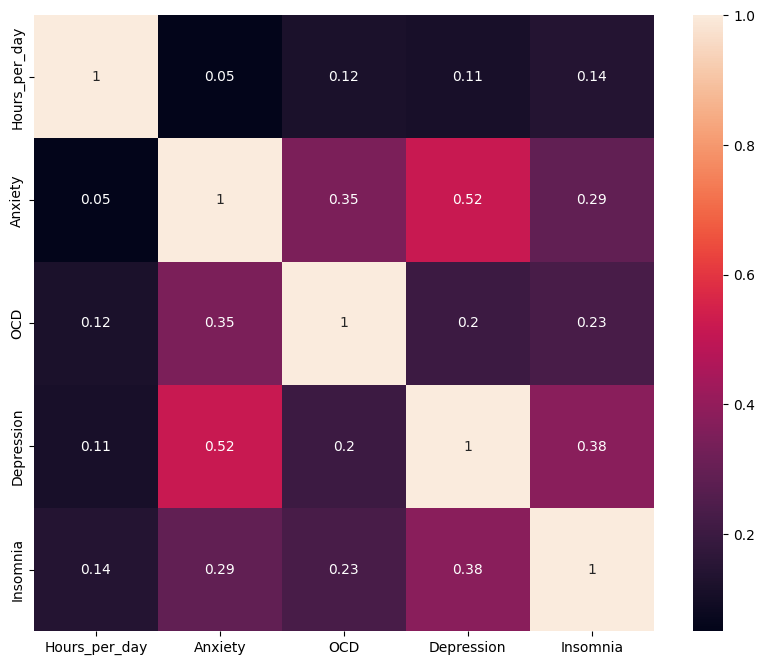

In [83]:
plt.figure(figsize=(10,8))
plot=sns.heatmap(df_numeric.corr().round(2),annot = True)

In [84]:
import pandas as pd
import scipy.stats as stats

In [85]:
correlation_coefficient, p_value = (stats.pearsonr(df['Hours_per_day'], df['Anxiety']))

In [86]:
correlation_coefficient, p_value

(0.048928857243938986, 0.1848580268196319)

In [87]:
correlation_coefficient = round(correlation_coefficient, 2)
p_value = round(p_value, 2)

In [88]:
correlation_coefficient

0.05

In [89]:
p_value

0.18

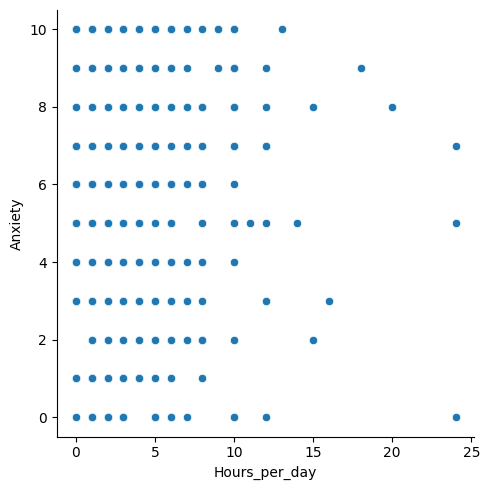

In [276]:
sns.relplot(x="Hours_per_day", y="Anxiety",data=df);


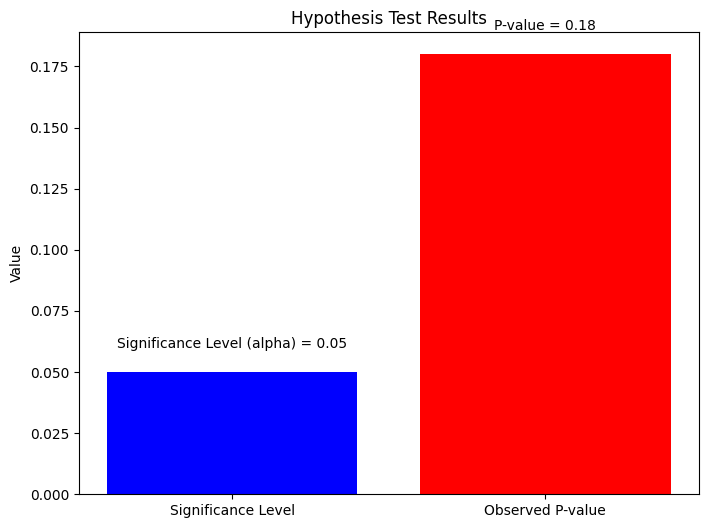

In [248]:
import matplotlib.pyplot as plt

# Significance level (alpha)
alpha = 0.05

# P-value from your analysis
p_value = 0.18

# Set up the graph
plt.figure(figsize=(8, 6))

# Heights of the bars
bar_heights = [alpha, p_value]

# X-axis positions for the bars
x_positions = [0, 1]

# X-axis labels
x_labels = ['Significance Level', 'Observed P-value']

# Colors for the bars
colors = ['blue', 'red']

# Plot the bar plot
plt.bar(x_positions, bar_heights, color=colors, tick_label=x_labels)

# Add labels and annotations
plt.ylabel('Value')
plt.title('Hypothesis Test Results')
plt.text(0, alpha + 0.01, f'Significance Level (alpha) = {alpha}', ha='center')
plt.text(1, p_value + 0.01, f'P-value = {p_value}', ha='center')

# Show the graph
plt.show()

Given the p value is greater than alpha, we fail to reject the null hypothesis. This means we don't have suffiecient evidence to conclude that listening to the music for longer hours has any impact on anxeity.

In [91]:
correlation_coefficient, p_value = (stats.pearsonr(df['Hours_per_day'], df['OCD']))

In [92]:
correlation_coefficient = round(correlation_coefficient, 2)
p_value = round(p_value, 2)
p_value, correlation_coefficient

(0.0, 0.12)

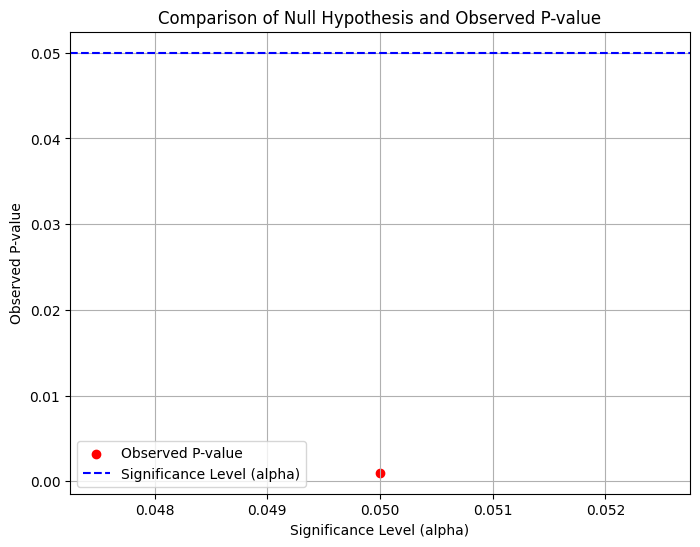

In [251]:
import matplotlib.pyplot as plt

# Significance level (alpha)
alpha = 0.05

# P-value from your analysis
p_value = 0.001

# Set up the graph
plt.figure(figsize=(8, 6))

# Plot the null hypothesis (alpha) as x-values and the observed p-value as y-values
plt.scatter([alpha], [p_value], color='red', label='Observed P-value')

# Plot the significance level (alpha) as a horizontal line
plt.axhline(y=alpha, color='blue', linestyle='--', label='Significance Level (alpha)')

# Add labels and annotations
plt.xlabel('Significance Level (alpha)')
plt.ylabel('Observed P-value')
plt.title('Comparison of Null Hypothesis and Observed P-value')
plt.legend()

# Show the graph
plt.grid(True)
plt.show()

A p-value of 0.001 indicates that if the null hypothesis tested were indeed true, then there would be a one-in-1,000 chance of observing results at least as extreme. This leads the observer to reject the null hypothesis because either a highly rare data result has been observed or the null hypothesis is incorrect. Thus we conclude there is no significant evidence indicating whether there is any relationship between listening to music for long hours and OCD.

In [253]:
correlation_coefficient, p_value = (stats.pearsonr(df['Hours_per_day'], df['Insomnia']))
correlation_coefficient = round(correlation_coefficient, 2)
p_value
p_value, correlation_coefficient

(9.847834304161026e-05, 0.14)

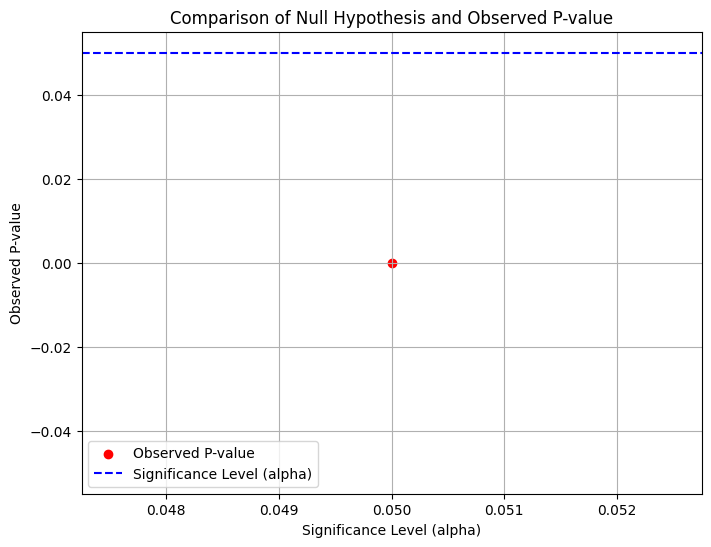

In [254]:
import matplotlib.pyplot as plt

# Significance level (alpha)
alpha = 0.05

# P-value from your analysis
p_value = 0.0

# Set up the graph
plt.figure(figsize=(8, 6))

# Plot the null hypothesis (alpha) as x-values and the observed p-value as y-values
plt.scatter([alpha], [p_value], color='red', label='Observed P-value')

# Plot the significance level (alpha) as a horizontal line
plt.axhline(y=alpha, color='blue', linestyle='--', label='Significance Level (alpha)')

# Add labels and annotations
plt.xlabel('Significance Level (alpha)')
plt.ylabel('Observed P-value')
plt.title('Comparison of Null Hypothesis and Observed P-value')
plt.legend()

# Show the graph
plt.grid(True)
plt.show()

A p-value of 0.001 indicates that if the null hypothesis tested were indeed true, then there would be a one-in-1,000 chance of observing results at least as extreme. This leads the observer to reject the null hypothesis because either a highly rare data result has been observed or the null hypothesis is incorrect. Thus we conclude there is no significant evidence indicating whether there is any relationship between listening to music for long hours and insomnia.



In [96]:
correlation_coefficient, p_value = (stats.pearsonr(df['Hours_per_day'], df['Depression']))
correlation_coefficient = round(correlation_coefficient, 2)
p_value
p_value, correlation_coefficient

(0.0024848554373826195, 0.11)

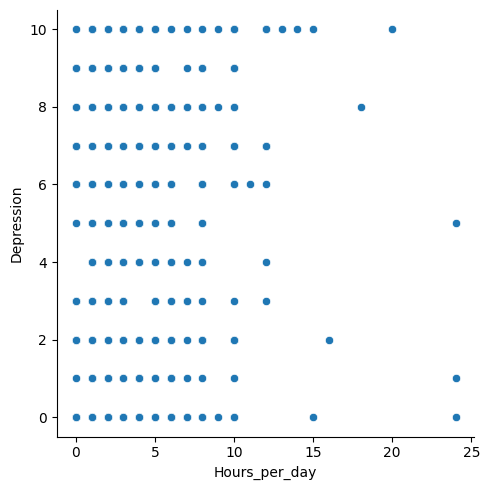

In [269]:
sns.relplot(x="Hours_per_day", y="Depression", data=df);


A p-value of 0.001 indicates that if the null hypothesis tested were indeed true, then there would be a one-in-1,000 chance of observing results at least as extreme. This leads the observer to reject the null hypothesis because either a highly rare data result has been observed or the null hypothesis is incorrect. Thus we conclude there is no significant evidence indicating whether there is any relationship between listening to music for long hours and depression.

In [141]:
df['While_working'] = df['While_working'].astype(int)

In [142]:
df['Instrumentalist'] = df['Instrumentalist'].astype(int)

In [143]:
df['Composer'] = df['Composer'].astype(int)

In [144]:
df['Foreign_languages'] = df['Foreign_languages'].astype(int)

In [145]:
df

,Unnamed: 0,Age,Primary_streaming_service,Hours_per_day,While_working,Instrumentalist,Composer,Fav_genre,Exploratory,Foreign_languages,...,Anxiety,Depression,Insomnia,OCD,Music_effects,Date,Time,Year,Month,Day
0,0,25,Apple Music,2,0,0,0,EDM,False,1,...,10,3,1,4,Improve,2022-08-28,23:26:58,2022,8,28
1,1,16,Other streaming service,4,1,0,0,EDM,True,1,...,4,7,1,3,Improve,2022-09-13,01:55:43,2022,9,13
2,2,22,Spotify,10,0,1,1,EDM,False,1,...,4,7,7,3,Improve,2022-08-28,17:15:18,2022,8,28
3,3,26,Spotify,6,1,0,0,EDM,False,1,...,10,10,8,2,No effect,2022-08-30,05:16:13,2022,8,30
4,4,18,I do not use a streaming service.,4,1,1,0,EDM,False,1,...,8,7,10,6,Improve,2022-09-02,09:25:05,2022,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,731,29,YouTube Music,2,1,0,0,Hip hop,True,1,...,2,2,2,5,Improve,2022-11-09,01:55:20,2022,11,9
732,732,17,Spotify,4,0,1,0,Classical,True,1,...,7,9,2,8,Worsen,2022-08-28,23:23:50,2022,8,28
733,733,17,Spotify,3,1,0,0,Classical,True,1,...,6,6,8,2,Improve,2022-08-28,11:58:48,2022,8,28
734,734,13,Spotify,1,1,0,0,Video game music,True,0,...,10,10,8,4,Worsen,2022-10-22,15:20:29,2022,10,22


In [258]:
correlation_coefficient, p_value = (stats.pearsonr(df['While_working'], df['Depression']))
correlation_coefficient = round(correlation_coefficient, 2)
p_value = round(p_value, 2)
p_value, correlation_coefficient

(0.12, 0.06)

In [259]:
p_value

0.12

In [279]:
import seaborn as sns

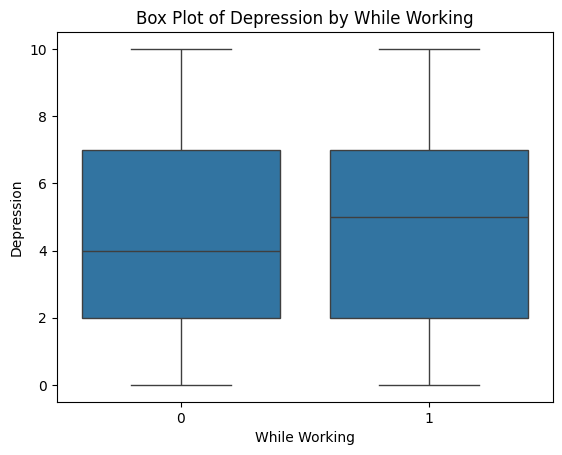

In [286]:
sns.boxplot(x=df["While_working"], y=df["Depression"])
plt.xlabel("While Working")
plt.ylabel("Depression")
plt.title("Box Plot of Depression by While Working")
plt.show()

In [288]:
from scipy.stats import pearsonr

In [289]:
correlation_coefficient, p_value = pearsonr(df['While_working'], df['Depression'])
correlation_coefficient = round(correlation_coefficient, 2)
p_value = round(p_value, 2)
print("Correlation Coefficient:", correlation_coefficient)
print("P-value:", p_value)

Correlation Coefficient: 0.06
P-value: 0.12


Given the p-value of 0.12, we do not have sufficient evidence to conclude that there is a statistically significant relationship between music listening at work and epression at the 0.05 significance level. The results suggest that the observed data could plausibly occur under the null hypothesis, and thus, we fail to reject it.

In [148]:
correlation_coefficient, p_value = (stats.pearsonr(df['While_working'], df['Anxiety']))
correlation_coefficient = round(correlation_coefficient, 2)
p_value = round(p_value, 2)
p_value, correlation_coefficient

(0.29, 0.04)

Given the p-value of 0.29, we do not have sufficient evidence to conclude that there is a statistically significant relationship between music listening at work and anxiety at the 0.05 significance level. The results suggest that the observed data could plausibly occur under the null hypothesis, and thus, we fail to reject it.

In [149]:
correlation_coefficient, p_value = (stats.pearsonr(df['While_working'], df['OCD']))
correlation_coefficient = round(correlation_coefficient, 2)
p_value = round(p_value, 2)
p_value, correlation_coefficient

(0.02, 0.08)

Given the p-value of 0.02, we have sufficient evidence to conclude that there is a statistically significant relationship between listening to music while working and OCD levels at the 0.05 significance level. The results suggest that the observed data are unlikely to have occurred under the null hypothesis, leading to its rejection. This means that listening to music while working is likely to have an effect on OCD levels based on our analysis.

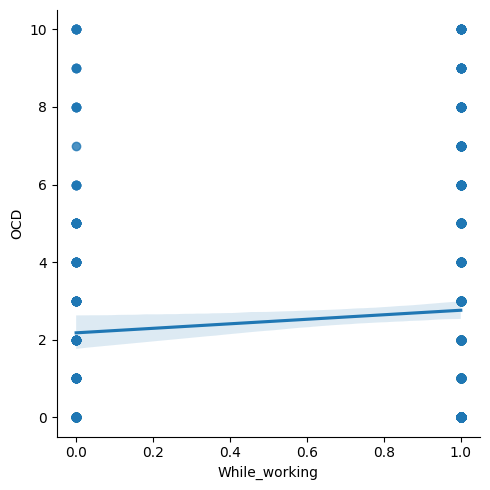

In [264]:
sns.lmplot(x="While_working", y="OCD", data=df);

In [150]:
correlation_coefficient, p_value = (stats.pearsonr(df['While_working'], df['Insomnia']))
correlation_coefficient = round(correlation_coefficient, 2)
p_value = round(p_value, 2)
p_value, correlation_coefficient

(0.31, 0.04)

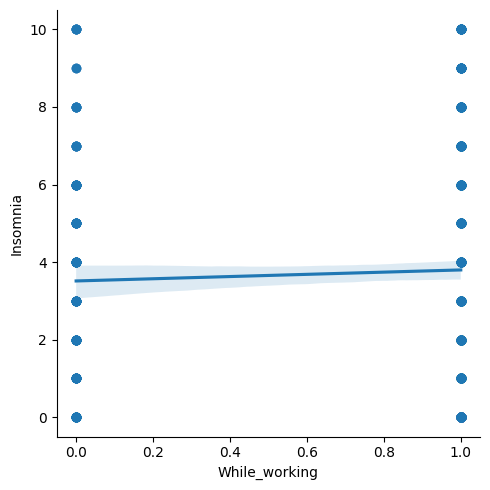

In [265]:
sns.lmplot(x="While_working", y="Insomnia", data=df);

Given the p-value of 0.31, we do not have sufficient evidence to conclude that there is a statistically significant relationship between listening to music while working and insomnia levels at the 0.05 significance level. Thus we fail to reject the null hypothesis.

In [151]:
correlation_coefficient, p_value = (stats.pearsonr(df['Instrumentalist'], df['Anxiety']))
correlation_coefficient = round(correlation_coefficient, 2)
p_value = round(p_value, 2)
p_value, correlation_coefficient

(0.48, 0.03)

Given the p-value of 0.48, we do not have sufficient evidence to conclude that there is a statistically significant relationship between being an instrumentalist and experiencing anxiety at the 0.05 significance level. The results suggest that the observed data could easily have occurred under the null hypothesis, leading to its failure to be rejected. This means that being an instrumentalist is likely not related to changes in anxiety levels based on our analysis.

In [152]:
correlation_coefficient, p_value = (stats.pearsonr(df['Instrumentalist'], df['Depression']))
correlation_coefficient = round(correlation_coefficient, 2)
p_value = round(p_value, 2)
p_value, correlation_coefficient

(0.88, 0.01)

Given the p-value of 0.88, we do not have sufficient evidence to conclude that there is a statistically significant relationship between being an instrumentalist and experiencing depression at the 0.05 significance level. The results suggest that the observed data could easily have occurred under the null hypothesis, leading to its failure to be rejected. This means that being an instrumentalist is likely not related to changes in depression levels based on our analysis.

In [153]:
correlation_coefficient, p_value = (stats.pearsonr(df['Instrumentalist'], df['OCD']))
correlation_coefficient = round(correlation_coefficient, 2)
p_value = round(p_value, 2)
p_value, correlation_coefficient

(0.72, 0.01)

Given the p-value of 0.72, we do not have sufficient evidence to conclude that there is a statistically significant relationship between being an instrumentalist and experiencing OCD at the 0.05 significance level. The results suggest that the observed data could easily have occurred under the null hypothesis, leading to its failure to be rejected. This means that being an instrumentalist is likely not related to changes in OCD levels based on our analysis.

In [154]:
correlation_coefficient, p_value = (stats.pearsonr(df['Instrumentalist'], df['Insomnia']))
correlation_coefficient = round(correlation_coefficient, 2)
p_value = round(p_value, 2)
p_value, correlation_coefficient

(0.43, 0.03)

Given the p-value of 0.43, we do not have sufficient evidence to conclude that there is a statistically significant relationship between being an instrumentalist and experiencing insomnia at the 0.05 significance level. The results suggest that the observed data could easily have occurred under the null hypothesis, leading to its failure to be rejected. This means that being an instrumentalist is likely not related to changes in insomnia levels based on our analysis.

In [155]:
correlation_coefficient, p_value = (stats.pearsonr(df['Composer'], df['Anxiety']))
correlation_coefficient = round(correlation_coefficient, 2)
p_value = round(p_value, 2)
p_value, correlation_coefficient

(0.98, 0.0)

Given the p-value of 0.98, we do not have sufficient evidence to conclude that there is a statistically significant relationship between being a composer and anxiety levels at the 0.05 significance level. The results suggest that the observed data could easily have occurred under the null hypothesis, leading to its failure to be rejected. This means that being a composer is likely not related to changes in anxiety levels based on our analysis.

In [156]:
correlation_coefficient, p_value = (stats.pearsonr(df['Composer'], df['Depression']))
correlation_coefficient = round(correlation_coefficient, 2)
p_value = round(p_value, 2)
p_value, correlation_coefficient

(0.17, 0.05)

Given the p-value of 0.17, we do not have sufficient evidence to conclude that there is a statistically significant relationship between being a composer and depression levels at the 0.05 significance level. The results suggest that the observed data could easily have occurred under the null hypothesis, leading to its failure to be rejected. This means that being a composer is likely not related to changes in depression levels based on our analysis.

In [157]:
correlation_coefficient, p_value = (stats.pearsonr(df['Composer'], df['OCD']))
correlation_coefficient = round(correlation_coefficient, 2)
p_value = round(p_value, 2)
p_value, correlation_coefficient

(0.67, 0.02)

Given the p-value of 0.67, we do not have sufficient evidence to conclude that there is a statistically significant relationship between being a composer and OCD levels at the 0.05 significance level. The results suggest that the observed data could easily have occurred under the null hypothesis, leading to its failure to be rejected. This means that being a composer is likely not related to changes in OCD levels based on our analysis.

In [158]:
correlation_coefficient, p_value = (stats.pearsonr(df['Composer'], df['Insomnia']))
correlation_coefficient = round(correlation_coefficient, 2)
p_value = round(p_value, 2)
p_value, correlation_coefficient

(0.01, 0.09)

Given the p-value of 0.01, we have sufficient evidence to conclude that there is a statistically significant relationship between being a composer and experiencing insomnia at the 0.05 significance level. The results suggest that the observed data are unlikely to have occurred under the null hypothesis, leading to its rejection. This means that being a composer is likely related to experiencing insomnia based on our analysis.

In [159]:
correlation_coefficient, p_value = (stats.pearsonr(df['Foreign_languages'], df['Anxiety']))
correlation_coefficient = round(correlation_coefficient, 2)
p_value = round(p_value, 2)
p_value, correlation_coefficient




(0.03, 0.08)

Given the p-value of 0.03, we do have sufficient evidence to conclude that there is a statistically significant relationship between listening in a foreign language and anxiety levels at the 0.05 significance level. The results indicate that the observed data are unlikely to have occurred under the null hypothesis, leading to the rejection of the null hypothesis. This suggests that there is a meaningful association between listening in a foreign language and anxiety levels in our dataset.

In [117]:
correlation_coefficient, p_value = (stats.pearsonr(df['Foreign_languages'], df['Depression']))
correlation_coefficient = round(correlation_coefficient, 2)
p_value = round(p_value, 2)
p_value, correlation_coefficient

(0.02, 0.09)

Given the p-value of 0.02, we do have sufficient evidence to conclude that there is a statistically significant relationship between listening in a foreign language and depression levels at the 0.05 significance level. The results indicate that the observed data are unlikely to have occurred under the null hypothesis, leading to the rejection of the null hypothesis. This suggests that there is a meaningful association between listening in a foreign language and depression levels in our dataset.

In [118]:
correlation_coefficient, p_value = (stats.pearsonr(df['Foreign_languages'], df['OCD']))
correlation_coefficient = round(correlation_coefficient, 2)
p_value = round(p_value, 2)
p_value, correlation_coefficient

(0.56, -0.02)

Given the p-value of 0.56, we do not have sufficient evidence to conclude that there is a statistically significant relationship between listening in a foreign language and OCD levels at the 0.05 significance level. The results suggest that the observed data could easily have occurred under the null hypothesis, leading to its failure to be rejected. This means that listening to music in a foreign language is likely not related to changes in OCD levels based on our analysis.

In [119]:
correlation_coefficient, p_value = (stats.pearsonr(df['Foreign_languages'], df['Insomnia']))
correlation_coefficient = round(correlation_coefficient, 2)
p_value = round(p_value, 2)
p_value, correlation_coefficient

(0.34, 0.04)

Given the p-value of 0.34, we do not have sufficient evidence to conclude that there is a statistically significant relationship between listening in a foreign language and insomnia levels at the 0.05 significance level. The results suggest that the observed data could easily have occurred under the null hypothesis, leading to its failure to be rejected. This means that listening to music in a foreign language is likely not related to changes in insomnia levels based on our analysis.

In [129]:
df.shape

(736, 37)

In [160]:
df.head()

,Unnamed: 0,Age,Primary_streaming_service,Hours_per_day,While_working,Instrumentalist,Composer,Fav_genre,Exploratory,Foreign_languages,...,Anxiety,Depression,Insomnia,OCD,Music_effects,Date,Time,Year,Month,Day
0,0,25,Apple Music,2,0,0,0,EDM,False,1,...,10,3,1,4,Improve,2022-08-28,23:26:58,2022,8,28
1,1,16,Other streaming service,4,1,0,0,EDM,True,1,...,4,7,1,3,Improve,2022-09-13,01:55:43,2022,9,13
2,2,22,Spotify,10,0,1,1,EDM,False,1,...,4,7,7,3,Improve,2022-08-28,17:15:18,2022,8,28
3,3,26,Spotify,6,1,0,0,EDM,False,1,...,10,10,8,2,No effect,2022-08-30,05:16:13,2022,8,30
4,4,18,I do not use a streaming service.,4,1,1,0,EDM,False,1,...,8,7,10,6,Improve,2022-09-02,09:25:05,2022,9,2


In [178]:
num = ['int64','float64']

In [183]:
num_vars = list(df.select_dtypes(include=num))

In [201]:
df_numeric2 = df[num_vars]

In [202]:
df_numeric2=df_numeric2.drop(columns=['Year','Month','Day'])

In [ ]:
from sklearn.model_selection import train_test_split

In [219]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [220]:
Corrmatrix = X_train.corr()

In [221]:
Corrmatrix

,Age,Hours_per_day,While_working,Instrumentalist,Composer,Foreign_languages,Anxiety,Depression,Insomnia,OCD
Age,1.000000,-0.014661,-0.076757,-0.134283,-0.025298,-0.138902,-0.182252,-0.134777,-0.011827,-0.138926
Hours_per_day,-0.014661,1.000000,0.283514,-0.041042,0.081796,0.093521,0.044990,0.099937,0.156280,0.100201
While_working,-0.076757,0.283514,1.000000,0.084310,0.024829,0.121057,0.031356,0.090881,0.047086,0.086942
Instrumentalist,-0.134283,-0.041042,0.084310,1.000000,0.415836,-0.005501,0.055419,0.001030,0.000463,0.048101
Composer,-0.025298,0.081796,0.024829,0.415836,1.000000,-0.037623,0.006348,0.052795,0.102264,0.003216
Foreign_languages,-0.138902,0.093521,0.121057,-0.005501,-0.037623,1.000000,0.127274,0.139139,0.061257,0.013777
Anxiety,-0.182252,0.044990,0.031356,0.055419,0.006348,0.127274,1.000000,0.529631,0.280888,0.384823
Depression,-0.134777,0.099937,0.090881,0.001030,0.052795,0.139139,0.529631,1.000000,0.394208,0.217698
Insomnia,-0.011827,0.156280,0.047086,0.000463,0.102264,0.061257,0.280888,0.394208,1.000000,0.263639
OCD,-0.138926,0.100201,0.086942,0.048101,0.003216,0.013777,0.384823,0.217698,0.263639,1.000000


<Axes: >

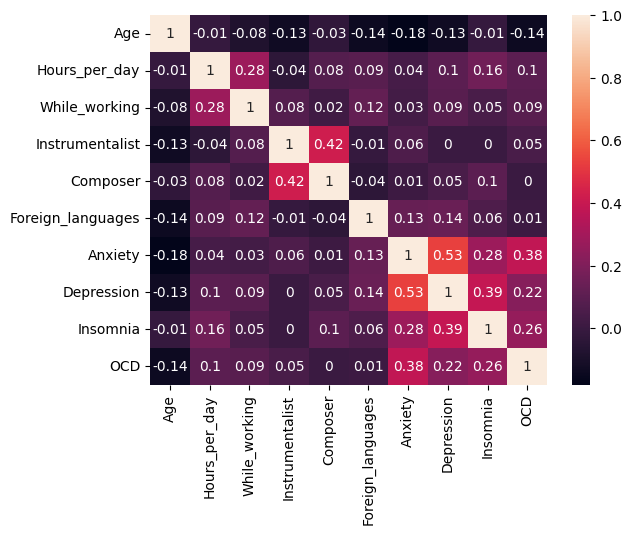

In [231]:
sns.heatmap(Corrmatrix.round(2),annot=True)

In [120]:
import pandas as pd
from scipy.stats import chi2_contingency


# Sample data
data = {
    'Primary streaming service': ['Spotify', 'Pandora', 'Spotify', 'YouTube Music', 'Spotify', 'Spotify'],
    'Fav genre': ['Latin', 'Rock', 'Video game music', 'Jazz', 'R&B', 'Jazz']
}
df = pd.DataFrame(data)

# Create a contingency table
contingency_table = pd.crosstab(df['Primary streaming service'], df['Fav genre'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:")
print(expected)

Chi-Square Statistic: 8.250000000000002
P-value: 0.4094383653539398
Degrees of Freedom: 8
Expected Frequencies Table:
[[0.33333333 0.16666667 0.16666667 0.16666667 0.16666667]
 [1.33333333 0.66666667 0.66666667 0.66666667 0.66666667]
 [0.33333333 0.16666667 0.16666667 0.16666667 0.16666667]]


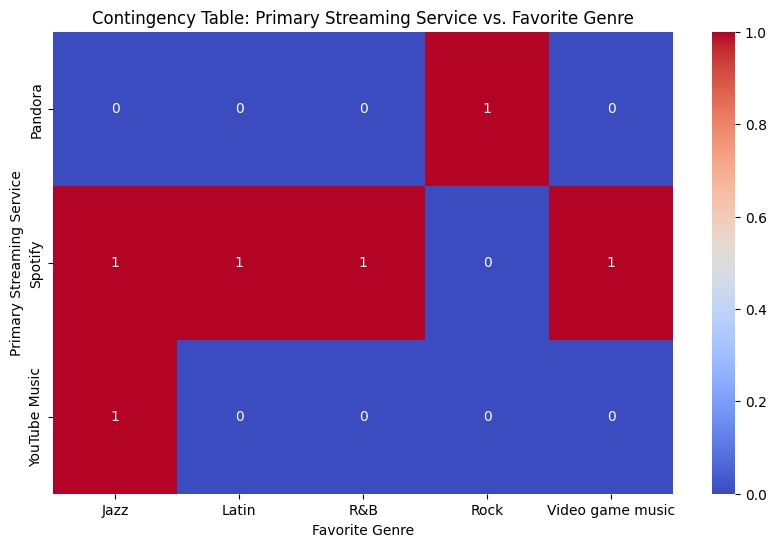

In [121]:
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Contingency Table: Primary Streaming Service vs. Favorite Genre')
plt.xlabel('Favorite Genre')
plt.ylabel('Primary Streaming Service')
plt.show()

In [122]:
df.shape

(6, 2)

In [123]:
import plotly.express as px
fig = px.histogram(df, x='Age')

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Primary streaming service', 'Fav genre'] but received: Age

In [ ]:
fig.show()

*Observation to be added and conclusion

In [ ]:
fig = px.pie(df, names='While working', title='Category Distribution')
fig.show()

*Observation to be added and conclusion

In [ ]:
fig = px.pie(df, names='Foreign languages', title='Category Distribution')
fig.show()

*Observation to be added and conclusion

In [ ]:
fig = px.pie(df, names='Primary streaming service', title='Category Distribution')
fig.show()

*Observation to be added and conclusion

In [ ]:
frequency_counts = df['Frequency [Country]'].value_counts()
mean_counts = df['Frequency [Country]'].value_counts().mean()
std_counts = df['Frequency [Country]'].value_counts().std()
plt.figure(figsize=(10, 6))
plt.bar(frequency_counts.index, frequency_counts.values, yerr=std_counts, capsize=5)
plt.title('Frequency [Country] with Error Bars')
plt.xlabel('Frequency [Country]')
plt.ylabel('Count')
plt.show()

In [ ]:
frequency_columns = [col for col in df.columns if col.startswith('Frequency')]
sns.pairplot(df[frequency_columns])
plt.show()

In [ ]:
fig = px.bar(df, x="Frequency [Country]", title="music listening frequency for Country")
fig.show()

In [ ]:
fig = px.bar(df, x="Frequency [Classical]", title="music listening frequency for Country")
fig.show()

In [ ]:
fig = px.bar(df, x="Frequency [EDM]", title="music listening frequency for Country")
fig.show()

In [ ]:
fig = px.bar(df, x="Frequency [Folk]", title="music listening frequency for Country")
fig.show()

In [ ]:
fig = px.bar(df, x="Frequency [Gospel]", title="music listening frequency for Country")
fig.show()

In [ ]:
fig = px.bar(df, x="Frequency [Hip hop]", title="music listening frequency for Country")
fig.show()

In [ ]:
fig = px.bar(df, x="Frequency [Jazz]", title="music listening frequency for Country")
fig.show()

In [ ]:
fig = px.bar(df, x="Frequency [K pop]", title="music listening frequency for Country")
fig.show()

In [ ]:
fig = px.bar(df, x="Frequency [Latin]", title="music listening frequency for Country")
fig.show()

In [ ]:
fig = px.bar(df, x="Frequency [Lofi]", title="music listening frequency for Country")
fig.show()

In [ ]:
fig = px.bar(df, x="Frequency [Metal]", title="music listening frequency for Country")
fig.show()

In [ ]:
fig = px.bar(df, x="Frequency [Pop]", title="music listening frequency for Country")
fig.show()

In [ ]:
fig = px.bar(df, x="Frequency [R&B]", title="music listening frequency for Country")
fig.show()

In [ ]:
fig = px.bar(df, x="Frequency [Rap]", title="music listening frequency for Country")
fig.show()

In [ ]:
fig = px.bar(df, x="Frequency [Rock]", title="music listening frequency for Country")
fig.show()

In [ ]:
fig = px.bar(df, x="Frequency [Video game music]", title="music listening frequency for Country")
fig.show()